#### Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm 

In [2]:
class_names = ["BUFFALO","CAT", "COW","DEER","DOG","ELEPHANT","FOX","FROG","HORSE","LION","MONKEY","PIG","RABBIT","SQUIRREI","TIGER"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes= len(class_names)

IMAGE_SIZE =(150,150)

#### Loarding the data

In [3]:
def load_data():
    """
    Loading data
    """ 
    
    datasets = ['c:/Users/user/Documents/DL/Class/Train', 'c:/Users/user/Documents/DL/Class/Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
    
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the image
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                
                # Append the image and its corresponding label to the lists
                images.append(image)
                labels.append(label)  # Append the label here, not inside the inner loop
            
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        
        output.append((images, labels))
        
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading c:/Users/user/Documents/DL/Class/Train


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.31it/s]


Loading c:/Users/user/Documents/DL/Class/Test


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 20.63it/s]


#### Let's explore the dataset

In [5]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 200
Number of testing examples: 107
Each image is of size: (150, 150)


#### Model Cnstruction

In [6]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(15, activation=tf.nn.softmax),  # 6 classes
    tf.keras.layers.Dense(15, activation='softmax')  # Add the dense layer here
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
epochs = 20
history = model.fit(train_images, train_labels, batch_size=12, validation_split=0.2, epochs=epochs)

Epoch 1/20
14/14 [==============================] - 5s 224ms/step - loss: 2.7185 - accuracy: 0.0938 - val_loss: 2.8011 - val_accuracy: 0.0000e+00
Epoch 2/20
14/14 [==============================] - 3s 191ms/step - loss: 2.7162 - accuracy: 0.0938 - val_loss: 2.8267 - val_accuracy: 0.0000e+00
Epoch 3/20
14/14 [==============================] - 3s 198ms/step - loss: 2.7081 - accuracy: 0.0938 - val_loss: 2.8526 - val_accuracy: 0.0000e+00
Epoch 4/20
14/14 [==============================] - 3s 191ms/step - loss: 2.7007 - accuracy: 0.0938 - val_loss: 2.8782 - val_accuracy: 0.0000e+00
Epoch 5/20
14/14 [==============================] - 3s 189ms/step - loss: 2.6936 - accuracy: 0.0938 - val_loss: 2.9035 - val_accuracy: 0.0000e+00
Epoch 6/20
14/14 [==============================] - 3s 191ms/step - loss: 2.6869 - accuracy: 0.0938 - val_loss: 2.9286 - val_accuracy: 0.0000e+00
Epoch 7/20
14/14 [==============================] - 3s 192ms/step - loss: 2.6804 - accuracy: 0.0938 - val_loss: 2.9536 - val

In [9]:
def plot_accuracy_loss(history):
    """
    Plot the accuracy and the loss during the training of the neural network.
    """
    fig = plt.figure(figsize=(10, 5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label="loss")
    plt.plot(history.history['val_loss'], 'ro--', label="val_loss")
    plt.title("Training Loss vs Validation Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

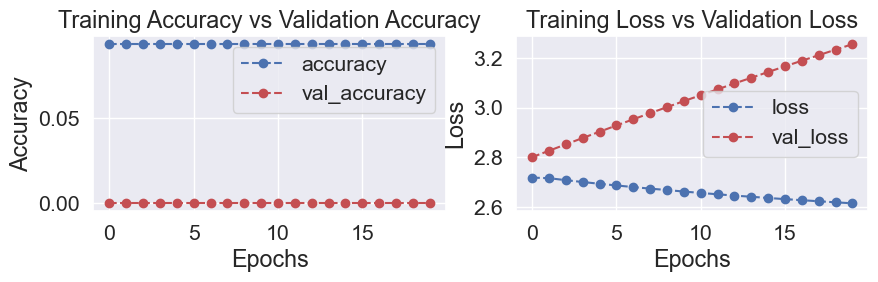

In [10]:
# Assuming history is the history object returned by model.fit
plot_accuracy_loss(history)

##### Let's see how the classifier is doing on random images.

In [21]:
predictions = model.predict(test_images)     #Vector ofprobabilities
pred_Labels= np.argmax(predictions,axis = 1)

4/4 [==============================] - 0s 86ms/step


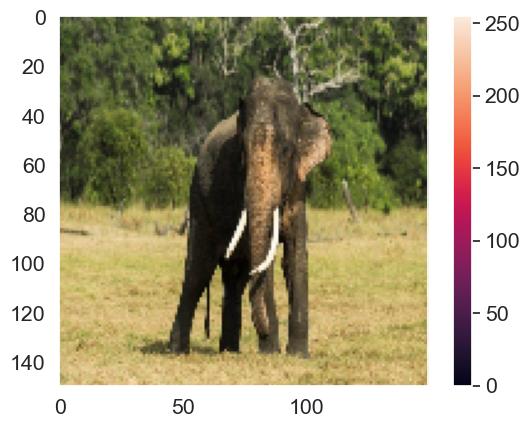

Predicted Label: ELEPHANT
True Label: ELEPHANT


In [31]:
# Function to display a random image with its predicted and true labels
def display_random_image(predictions, test_images, test_labels, class_names):
    # Select a random index from the test set
    index = np.random.randint(len(test_images))
    
    # Get the predicted and true labels for the selected image
    pred_label = np.argmax(predictions[index])
    true_label = test_labels[index]
    
    # Display the image
    plt.figure()
    plt.imshow(test_images[index].astype('uint8'))  # Ensure the image is in the correct format
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
    # Print the predicted and true labels
    print(f"Predicted Label: {class_names[pred_label]}")
    print(f"True Label: {class_names[true_label]}")

# Use the function to display a random image and its labels
display_random_image(predictions, test_images, test_labels, class_names)
